## Sorting Arrays

* np.sort(x) -> ordena el array sin modificar este
* x.sort(x)  -> ordena el array modificando este


In [1]:
import numpy as np

In [15]:
x = np.array([2,1,4,3,5])

In [16]:
# ordena el array sin modificar este
np.sort(x)

array([1, 2, 3, 4, 5])

In [17]:
# ordena el array modificando este
x.sort()

In [18]:
x

array([1, 2, 3, 4, 5])

In [19]:
x = np.array([2,1,4,3,5])

In [20]:
# ordena el array devolviendo los índices de este
np.argsort(x)


array([1, 0, 3, 2, 4])

In [21]:
i = np.argsort(x)

In [22]:
# fancy indexing
x[i]

array([1, 2, 3, 4, 5])

In [23]:
x

array([2, 1, 4, 3, 5])

Si hacemos un sort y lo guardamos, creamos un nuevo array ordenado

In [30]:
x = np.array([2,1,4,3,5])

In [31]:
y = np.sort(x)

In [32]:
y

array([1, 2, 3, 4, 5])

In [33]:
y[0] = 10

In [34]:
y

array([10,  2,  3,  4,  5])

In [35]:
x

array([2, 1, 4, 3, 5])

### Sorting along rows or columns

Atención!!!
Estas ordenaciones trata cada columna o fila como arrays independientes
de forma que si ordenamos los valores de esta forma perderemos la
relación entre filas y columnas

In [37]:
rand = np.random.RandomState(42)

In [38]:
x= rand.randint(0, 10, (4,6))

In [39]:
x

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [40]:
# sort each colum of x
np.sort(x, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [41]:
# sort each row of x
np.sort(x, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

### Partial Sorts

* np.partition(x,K): el resultado es un nuevo array donde los K valores más pequeños quedan ordenados a la izquierda del array y luego le acompañan el resto de valores. La ordenación es arbitraria.


In [42]:
x = np.array([7,2,3,1,6,5,4])

In [43]:
np.partition(x,3)

array([2, 1, 3, 4, 6, 5, 7])

In [45]:
x= rand.randint(0, 10, (4,6))

In [46]:
x

array([[6, 7, 2, 0, 3, 1],
       [7, 3, 1, 5, 5, 9],
       [3, 5, 1, 9, 1, 9],
       [3, 7, 6, 8, 7, 4]])

In [48]:
# en un array bidimensional, ordena las filas con los dos primeros
# valores más pequeños por cada una de ellas
np.partition(x,2, axis= 1) 

array([[0, 1, 2, 6, 3, 7],
       [1, 3, 5, 7, 5, 9],
       [1, 1, 3, 9, 5, 9],
       [3, 4, 6, 8, 7, 7]])

## k-Nearest-Neighbors

In [49]:
x= np.random.rand(10,2)

In [62]:
x.shape

(10, 2)

In [50]:
x

array([[0.97799341, 0.29933629],
       [0.1357846 , 0.63118532],
       [0.73438735, 0.71192969],
       [0.95927763, 0.38352387],
       [0.310287  , 0.45059295],
       [0.32594072, 0.58179853],
       [0.05565432, 0.01079489],
       [0.65330796, 0.32436882],
       [0.71760043, 0.24160679],
       [0.59056807, 0.43052563]])

In [51]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

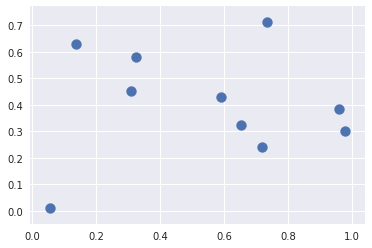

In [52]:
plt.scatter(x[:,0], x[:,1], s=100)

In [67]:
differences1 = x[:,np.newaxis,:]
differences2 = x[np.newaxis,:, :] 

In [82]:
differences1.shape

(10, 1, 2)

In [83]:
differences2.shape

(1, 10, 2)

In [63]:
differences = x[:,np.newaxis,:] - x[np.newaxis,:, :] 

In [64]:
type(differences)

numpy.ndarray

In [65]:
differences.shape

(10, 10, 2)

In [66]:
differences

array([[[ 0.        ,  0.        ],
        [ 0.8422088 , -0.33184903],
        [ 0.24360606, -0.4125934 ],
        [ 0.01871577, -0.08418758],
        [ 0.6677064 , -0.15125666],
        [ 0.65205269, -0.28246224],
        [ 0.92233909,  0.28854141],
        [ 0.32468545, -0.02503253],
        [ 0.26039298,  0.0577295 ],
        [ 0.38742533, -0.13118934]],

       [[-0.8422088 ,  0.33184903],
        [ 0.        ,  0.        ],
        [-0.59860274, -0.08074437],
        [-0.82349303,  0.24766145],
        [-0.1745024 ,  0.18059237],
        [-0.19015612,  0.04938679],
        [ 0.08013029,  0.62039043],
        [-0.51752335,  0.3068165 ],
        [-0.58181583,  0.38957853],
        [-0.45478347,  0.20065969]],

       [[-0.24360606,  0.4125934 ],
        [ 0.59860274,  0.08074437],
        [ 0.        ,  0.        ],
        [-0.22489029,  0.32840582],
        [ 0.42410034,  0.26133674],
        [ 0.40844662,  0.13013116],
        [ 0.67873303,  0.7011348 ],
        [ 0.08107939,  0